Domain:E-Commerce

Problem Statement:Designing a model to predict the purchase rate according to the gender in myntra store

In [ ]:
contributors:Thejaswini G M
            Pavithra D Naick
            Seethal P V


Importing required libraries

In [107]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Data Collection
Reading the dataset to the python environment and understanding data

In [108]:
data=pd.read_excel('myntra_fashion_products_free_dataset.xls')
data.head()

,name,sku,mpn,price,in_stock,currency,brand,description,images,gender
0,DKNY Unisex Black & Grey Printed Medium Trolle...,10017413,10017413,11745,True,INR,DKNY,"Black and grey printed medium trolley bag, sec...",http://assets.myntassets.com/assets/images/100...,Unisex
1,EthnoVogue Women Beige & Grey Made to Measure ...,10016283,10016283,5810,True,INR,EthnoVogue,Beige & Grey made to measure kurta with churid...,http://assets.myntassets.com/assets/images/100...,Women
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,10009781,10009781,899,True,INR,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...,http://assets.myntassets.com/assets/images/100...,Women
3,Raymond Men Blue Self-Design Single-Breasted B...,10015921,10015921,5599,True,INR,Raymond,Blue self-design bandhgala suitBlue self-desig...,http://assets.myntassets.com/assets/images/pro...,Men
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,10017833,10017833,759,True,INR,Parx,"Brown and off-white printed casual shirt, has ...",http://assets.myntassets.com/assets/images/pro...,Men


In [109]:
data.shape

(12491, 10)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         12491 non-null  object
 1   sku          12491 non-null  int64 
 2   mpn          12491 non-null  int64 
 3   price        12491 non-null  int64 
 4   in_stock     12491 non-null  bool  
 5   currency     12491 non-null  object
 6   brand        12491 non-null  object
 7   description  12491 non-null  object
 8   images       12491 non-null  object
 9   gender       12491 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 890.6+ KB


In [111]:
data.describe()

,sku,mpn,price
count,1.249100e+04,1.249100e+04,12491.000000
mean,9.917160e+06,9.917160e+06,1452.660956
std,1.438006e+06,1.438006e+06,2118.503976
min,1.012060e+05,1.012060e+05,90.000000
25%,1.006215e+07,1.006215e+07,649.000000
50%,1.015463e+07,1.015463e+07,920.000000
75%,1.021565e+07,1.021565e+07,1499.000000
max,1.027514e+07,1.027514e+07,63090.000000


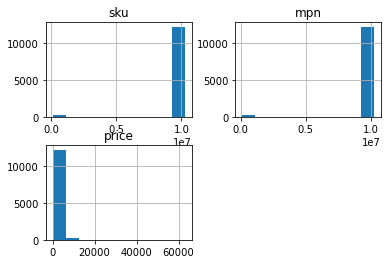

In [112]:
#visualizing the data  

data.hist()
plt.show()

Insights: In this dataset 12491 samples and 10 features.The features are :(1)name,name of each product(2)sku(stock keeping unit),its a number that retailers assign to products to keep track of stock levels.(3)mpn(Manufacturer Part Number) is the product identifier used to differentiate a product among other (similar) products from the same brand/manufacturer.(4)price . (5)in_stock,stock availability.(6)currency (7)brand,brand name (8)description,description of product.(9)images (10)gender

# 2.Data preprocessing

In [113]:
data.columns

Index(['name', 'sku', 'mpn', 'price', 'in_stock', 'currency', 'brand',
       'description', 'images', 'gender'],
      dtype='object')

In [114]:
#checking for duplicated entries
duplicates = data.duplicated().sum() 
if  duplicates == 0:
    print("There are no duplicted rows in this data")
else:
    print('There are: ', str(duplicates), " duplicates")

There are no duplicted rows in this data


In [115]:
#Checking missing values
data.isna().sum()

name           0
sku            0
mpn            0
price          0
in_stock       0
currency       0
brand          0
description    0
images         0
gender         0
dtype: int64

Insight:There is no missing values.

#outliers

<AxesSubplot:title={'center':'Box plot to find outliers'}>

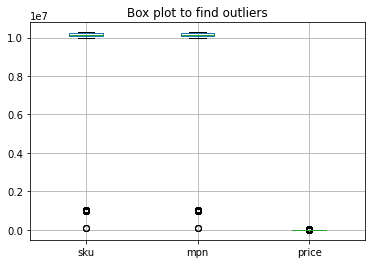

In [116]:

plt.title('Box plot to find outliers')
data.boxplot(column=['sku','mpn','price'],figsize=(40,15),grid=True)

In [117]:


q1=np.percentile(data['sku'],25,interpolation='midpoint')
q2=np.percentile(data['sku'],50,interpolation='midpoint')
q3=np.percentile(data['sku'],75,interpolation='midpoint')
print('q1=',q1)
print('q2=',q2)
print('q3=',q3)
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3-1.5*IQR
print('low_lim:',low_lim)
print('up_lim:',up_lim)

q1= 10062153.0
q2= 10154629.0
q3= 10215654.0
low_lim: 9831901.5
up_lim: 9985402.5


In [118]:
outlier=[]
for x in data['sku']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
data['sku']=np.where(data['sku']>up_lim,up_lim,np.where(data['sku']<low_lim,low_lim,data['sku']))
data

,name,sku,mpn,price,in_stock,currency,brand,description,images,gender
0,DKNY Unisex Black & Grey Printed Medium Trolle...,9985402.5,10017413,11745,True,INR,DKNY,"Black and grey printed medium trolley bag, sec...",http://assets.myntassets.com/assets/images/100...,Unisex
1,EthnoVogue Women Beige & Grey Made to Measure ...,9985402.5,10016283,5810,True,INR,EthnoVogue,Beige & Grey made to measure kurta with churid...,http://assets.myntassets.com/assets/images/100...,Women
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,9985402.5,10009781,899,True,INR,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...,http://assets.myntassets.com/assets/images/100...,Women
3,Raymond Men Blue Self-Design Single-Breasted B...,9985402.5,10015921,5599,True,INR,Raymond,Blue self-design bandhgala suitBlue self-desig...,http://assets.myntassets.com/assets/images/pro...,Men
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,9985402.5,10017833,759,True,INR,Parx,"Brown and off-white printed casual shirt, has ...",http://assets.myntassets.com/assets/images/pro...,Men
...,...,...,...,...,...,...,...,...,...,...
12486,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,9985402.5,10262843,1299,True,INR,Pepe Jeans,"Black dark wash 5-pocket low-rise jeans, clean...",http://assets.myntassets.com/assets/images/102...,Men
12487,Mochi Women Gold-Toned Solid Heels,9985402.5,10261721,1990,True,INR,Mochi,"A pair of gold-toned open toe heels, has regul...",http://assets.myntassets.com/assets/images/pro...,Women
12488,612 league Girls Navy Blue & White Printed Reg...,9985402.5,10261607,602,True,INR,612 league,Navy Blue and White printed mid-rise denim sho...,http://assets.myntassets.com/assets/images/102...,Girls
12489,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,9985402.5,10266621,8950,True,INR,Bvlgari,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,http://assets.myntassets.com/assets/images/102...,Men


Text(0.5, 1.0, 'Box plot of sku')

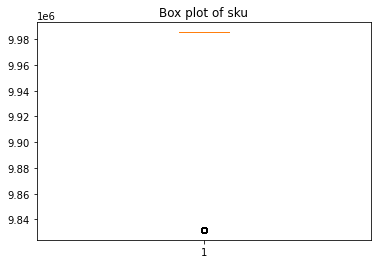

In [119]:
plt.boxplot(data['sku'])
plt.title('Box plot of sku')

In [120]:
q1=np.percentile(data['mpn'],25,interpolation='midpoint')
q2=np.percentile(data['mpn'],50,interpolation='midpoint')
q3=np.percentile(data['mpn'],75,interpolation='midpoint')
print('q1=',q1)
print('q2=',q2)
print('q3=',q3)
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3-1.5*IQR
print('low_lim:',low_lim)
print('up_lim:',up_lim)

q1= 10062153.0
q2= 10154629.0
q3= 10215654.0
low_lim: 9831901.5
up_lim: 9985402.5


In [121]:
outlier=[]
for x in data['mpn']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
data['mpn']=np.where(data['mpn']>up_lim,up_lim,np.where(data['mpn']<low_lim,low_lim,data['mpn']))
#data

Text(0.5, 1.0, 'Box plot of mpn')

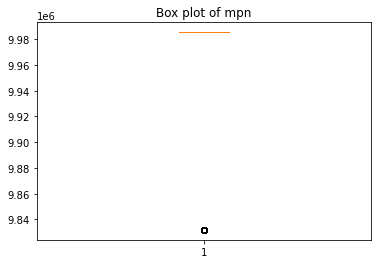

In [122]:
plt.boxplot(data['mpn'])
plt.title('Box plot of mpn')

In [123]:
q1=np.percentile(data['price'],25,interpolation='midpoint')
q2=np.percentile(data['price'],50,interpolation='midpoint')
q3=np.percentile(data['price'],75,interpolation='midpoint')
print('q1=',q1)
print('q2=',q2)
print('q3=',q3)
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3-1.5*IQR
print('low_lim:',low_lim)
print('up_lim:',up_lim)

q1= 649.0
q2= 920.0
q3= 1499.0
low_lim: -626.0
up_lim: 224.0


In [16]:
outlier=[]
for x in data['price']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
data['price']=np.where(data['price']>up_lim,up_lim,np.where(data['price']<low_lim,low_lim,data['price']))
#data

Text(0.5, 1.0, 'Box plot of mpn')

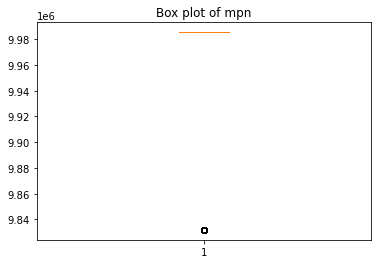

In [124]:
plt.boxplot(data['mpn'])
plt.title('Box plot of mpn')

Insight:For outlier preprocessor we have take 3 field.They are ,sku,mpn,price.we handled the outliers

#Encoding

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         12491 non-null  object 
 1   sku          12491 non-null  float64
 2   mpn          12491 non-null  float64
 3   price        12491 non-null  int64  
 4   in_stock     12491 non-null  bool   
 5   currency     12491 non-null  object 
 6   brand        12491 non-null  object 
 7   description  12491 non-null  object 
 8   images       12491 non-null  object 
 9   gender       12491 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 890.6+ KB


In [231]:
x=data.drop(['images','name','gender'],axis=1)
y=pd.DataFrame(data['gender'])

In [127]:
x.head()

,sku,mpn,price,in_stock,currency,brand,description
0,9985402.5,9985402.5,11745,True,INR,DKNY,"Black and grey printed medium trolley bag, sec..."
1,9985402.5,9985402.5,5810,True,INR,EthnoVogue,Beige & Grey made to measure kurta with churid...
2,9985402.5,9985402.5,899,True,INR,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...
3,9985402.5,9985402.5,5599,True,INR,Raymond,Blue self-design bandhgala suitBlue self-desig...
4,9985402.5,9985402.5,759,True,INR,Parx,"Brown and off-white printed casual shirt, has ..."


In [128]:
y.head()

,gender
0,Unisex
1,Women
2,Women
3,Men
4,Men


In [232]:
def preprocess_features(x):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index=x.index)

    # Investigate each feature column for the data
    for col,col_data in x.iteritems():
        
        #data type is non-numeric, replace all true/false values with 1/0
        if col_data.dtype==object:
            col_data=col_data.replace(['True', 'False'],[1, 0])
        #if col_data.dtype==bool:
            #col_data=col_data.replace(['True', 'False'],[1, 0])

        #data type is categorical, convert to dummy variables
        if col_data.dtype==object:
        
            col_data =pd.get_dummies(col_data,prefix = col)  
        
        output = output.join(col_data)
    
    return output

x= preprocess_features(x)
x.columns
print('Processed feature columns:\n',x.head())

Processed feature columns:
          sku       mpn     price  in_stock  currency_INR  brand_109F  \
0  9985402.5  0.161105  4.858500  0.157672             1           0   
1  9985402.5  0.161105  2.056882  0.157672             1           0   
2  9985402.5  0.161105 -0.261356  0.157672             1           0   
3  9985402.5  0.161105  1.957280  0.157672             1           0   
4  9985402.5  0.161105 -0.327443  0.157672             1           0   

   brand_20Dresses  brand_612 league  brand_7Rainbow  brand_AASK  ...  \
0                0                 0               0           0  ...   
1                0                 0               0           0  ...   
2                0                 0               0           0  ...   
3                0                 0               0           0  ...   
4                0                 0               0           0  ...   

   description_Yellow wraparound braceletMaterial: FabricClosure: Drawstring  \
0                   

In [131]:
y['gender'].value_counts()

Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: gender, dtype: int64

In [132]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['gender']
for i in np.arange(len(a)):
    y[a[i]]=label_en.fit_transform(y[a[i]])

In [133]:
y.head()

,gender
0,3
1,5
2,5
3,2
4,2


In [136]:
#onehot encoding

x['currency'].value_counts()

INR    12491
Name: currency, dtype: int64

In [137]:
cur=pd.get_dummies(x['currency'])
x=x.drop(['currency'],axis=1)

In [138]:
x.head()

,sku,mpn,price,in_stock,brand,description
0,9985402.5,9985402.5,11745,True,DKNY,"Black and grey printed medium trolley bag, sec..."
1,9985402.5,9985402.5,5810,True,EthnoVogue,Beige & Grey made to measure kurta with churid...
2,9985402.5,9985402.5,899,True,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...
3,9985402.5,9985402.5,5599,True,Raymond,Blue self-design bandhgala suitBlue self-desig...
4,9985402.5,9985402.5,759,True,Parx,"Brown and off-white printed casual shirt, has ..."


In [99]:
x.shape

(12491, 5)

Insight:we handled the non numeric values present in dataset by converting it into 1 and 0.and the categorical values, convert to dummy variables.

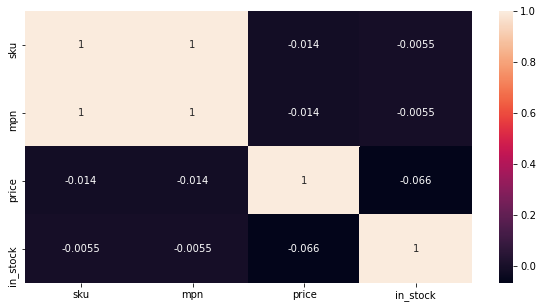

In [139]:
#Feature reduction

plt.figure(figsize=(10,5))
corrmatrix=x.corr()
sns.heatmap(corrmatrix,annot=True)
plt.show()

In [140]:
x.drop(['sku'],axis=1,inplace=True)

In [141]:
x.columns

Index(['mpn', 'price', 'in_stock', 'brand', 'description'], dtype='object')

Insight: In feature reduction, we plot the correlationmatrix.In correlation,we can see that sku is highly correlated,so we dropped the sku feature.

In [142]:
#Standardization
#Standard scaling

x.describe()
#type(x)

,mpn,price
count,1.249100e+04,12491.000000
mean,9.981519e+06,1452.660956
std,2.410513e+04,2118.503976
min,9.831902e+06,90.000000
25%,9.985402e+06,649.000000
50%,9.985402e+06,920.000000
75%,9.985402e+06,1499.000000
max,9.985402e+06,63090.000000


In [143]:
from sklearn.preprocessing import StandardScaler
col_scale=['mpn','price','in_stock']
scalar=StandardScaler()
data[col_scale]=scaler.fit_transform(data[col_scale])
data[col_scale].head()

,mpn,price,in_stock
0,0.161105,4.858500,0.157672
1,0.161105,2.056882,0.157672
2,0.161105,-0.261356,0.157672
3,0.161105,1.957280,0.157672
4,0.161105,-0.327443,0.157672


Insight:Rescaling the feature values

# 3.EDA(Exploratory Data Analysis)

In [ ]:
#1.Univarient analysis

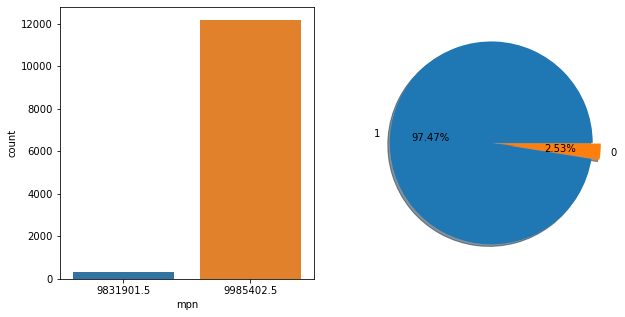

In [57]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = data['mpn'], data = x)

plt.subplot(1, 2, 2)
plt.pie(x= x['mpn'].value_counts(), labels = ("1","0"), explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

In [218]:
data.columns

Index(['name', 'sku', 'mpn', 'price', 'in_stock', 'currency', 'brand',
       'description', 'images', 'gender'],
      dtype='object')

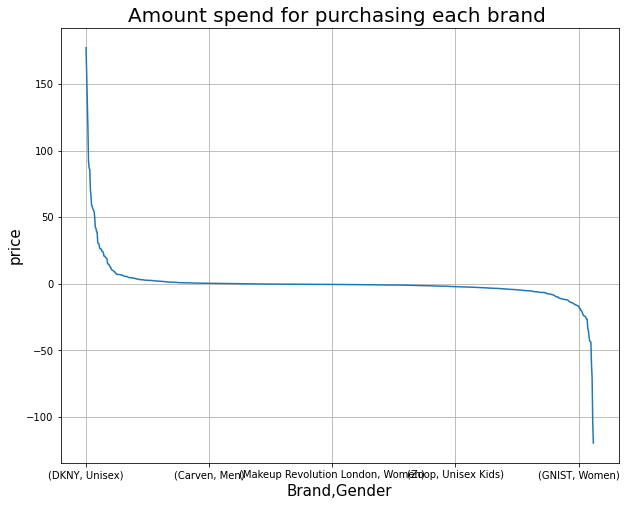

In [228]:
#Univarient analysis
plt.figure(figsize=(10,8))
data.groupby(['brand','gender'])['price'].sum().sort_values(ascending=False).plot()

plt.grid()
plt.xlabel("Brand,Gender",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Amount spend for purchasing each brand ',fontsize=20);

<Figure size 720x144 with 0 Axes>

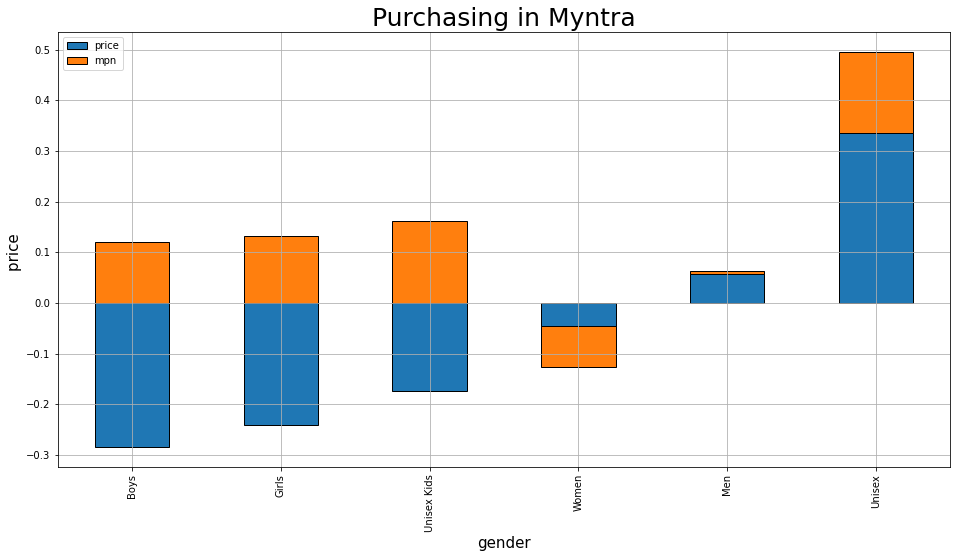

In [229]:

plt.figure(figsize=(10,2))
data[['brand', 'gender', 'price', 'mpn']].groupby('gender').mean().sort_values('price').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8));
plt.xlabel('gender',fontsize=15)
plt.ylabel('price ',fontsize=15)
plt.title('Purchasing in Myntra',fontsize=25)
plt.grid();

Insight:In univarient we have used one variable for analysing the reset of the variables

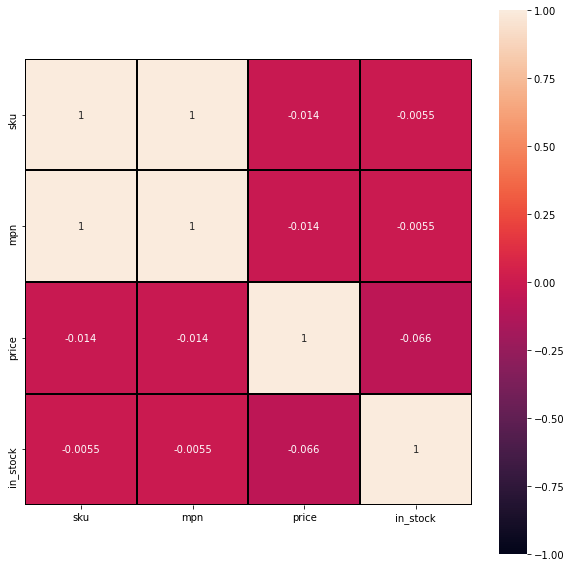

In [225]:
#Bivarient analysis

fig=plt.gcf()
fig.set_size_inches(10,10)
fig=sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

Insight:In Bivarient,we have used two variables for analysing the reset of the variables,and we have came to the conclusion that,sku is having the highest correlation.

# 4 Modeling

#Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is. We will be implementing these algorithms to compare:

#1 LogisticRegression

#2 K–NearestNeighbour (KNN)

#3 Support Vector Machine (SVM)

#4 Decision Trees

#5 RandomForest

In [ ]:
#spliting data

In [198]:
x=data.drop(['images','name','description','in_stock','brand','currency','gender'],axis=1)
y=pd.DataFrame(data['gender'])

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [156]:
x_train.shape

(8743, 3)

In [158]:
y_train.shape

(8743, 1)

In [159]:
x_test.shape

(3748, 3)

In [160]:
y_test.shape

(3748, 1)

In [161]:
x.columns

Index(['sku', 'mpn', 'price'], dtype='object')

In [ ]:
#build model

In [184]:
# Import the three supervised learning models from sklearn

from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [185]:
#1.Support Vector Machine model

svm=SVC()
svm.fit(x_train,y_train)

C:\Users\Seethal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [187]:
y_pred=svm.predict(x_test)
print('Accuracy is:',accuracy_score(y_pred,y_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy is: 0.40795090715048027
confusion matrix:
 [[   0    0    0    0    0  327]
 [   0    0    0    0    0  130]
 [   0    0    0    0    0 1373]
 [   0    0    0    0    0  371]
 [   0    0    0    0    0   18]
 [   0    0    0    0    0 1529]]


In [181]:
# 2.Random Forest Model


from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

<ipython-input-181-d57ceac264ff>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)


In [182]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.5186766275346851
confusion matrix:
 [[ 64   7 148   3   0 105]
 [ 20   3  63   1   0  43]
 [ 49  11 905  35   0 373]
 [ 21   4 133 106   0 107]
 [  0   1   8   2   2   5]
 [ 68  25 508  64   0 864]]


In [173]:
# 3. Logistic regression model

lr=LogisticRegression()
lr.fit(x_train,y_train)

#predict on the test data
y_pred=lr.predict(x_test)

#calculate the accuracy score
print('Accuracy:',accuracy_score(y_pred,y_test))

C:\Users\Seethal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.40795090715048027


In [174]:
#4.Decision Tree model

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

        Boys       0.29      0.22      0.25       327
       Girls       0.07      0.02      0.03       130
         Men       0.51      0.68      0.58      1373
      Unisex       0.49      0.30      0.37       371
 Unisex Kids       1.00      0.11      0.20        18
       Women       0.59      0.54      0.56      1529

    accuracy                           0.52      3748
   macro avg       0.49      0.31      0.33      3748
weighted avg       0.51      0.52      0.50      3748

confusion_matrix:
 [[ 71   3 150   3   0 100]
 [ 21   3  64   2   0  40]
 [ 51  14 927  37   0 344]
 [ 21   5 147 110   0  88]
 [  2   1   9   0   2   4]
 [ 82  20 532  72   0 823]]
accuracy is 0.5165421558164355


In [189]:
# 5.K-Nearest Neighbors model

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

C:\Users\Seethal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Seethal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seethal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seethal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetr

              precision    recall  f1-score   support

        Boys       0.27      0.21      0.24       327
       Girls       0.08      0.04      0.05       130
         Men       0.47      0.64      0.54      1373
      Unisex       0.45      0.18      0.26       371
 Unisex Kids       0.00      0.00      0.00        18
       Women       0.55      0.50      0.53      1529

    accuracy                           0.48      3748
   macro avg       0.30      0.26      0.27      3748
weighted avg       0.47      0.48      0.46      3748

confusion_matrix:
 [[ 70  10 145   5   0  97]
 [ 27   5  59   2   0  37]
 [ 65  19 872  27   0 390]
 [ 21   3 179  67   0 101]
 [  0   1   8   1   0   8]
 [ 81  26 604  47   0 771]]
accuracy is 0.4762540021344717


Insight:RandomForest model appears a high score of accuracy.

# 5 Model Fine Tuning

In [209]:
rft=RandomForestClassifier(n_estimators=850,max_depth=100,random_state=30,criterion='entropy',max_features='sqrt')
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)
f1_score(y_test,y_pred,average='weighted')

0.2371996377866175

Insight:To increase in accuracy,we have used hyperparameter tuning.